In [5]:
import sympy as sp
import numpy as np
from scipy.linalg import eig
from spikes.solver import solve_linear_system_sympy

### Eq. 4.2

In [13]:
A = np.array([[-5, -10, 7], [7, -5, -10], [-10, 7, -5]])
B = np.array([1,1,1])
X0 = np.array([0, 0, 0])

eigenvalues, eigenvectors = eig(A)
eigenvalues

array([-3.5+14.72243186j, -3.5-14.72243186j, -8.  +0.j        ])

In [10]:
import sympy as sp
import numpy as np

# Define the symbolic variables
t = sp.Symbol('t')
x1, x2, x3 = sp.Function('x1')(t), sp.Function('x2')(t), sp.Function('x3')(t)

# Define the matrix A
A = sp.Matrix([[-5, -10, 7],
               [7, -5, -10],
               [-10, 7, -5]])

# Define the vector X
X = sp.Matrix([x1, x2, x3])

# Define the system of differential equations
dX_dt = A * X

# Create the system of differential equations
system = [sp.Eq(sp.diff(x1, t), dX_dt[0]),
          sp.Eq(sp.diff(x2, t), dX_dt[1]),
          sp.Eq(sp.diff(x3, t), dX_dt[2])]

# Solve the system of differential equations
solution = sp.dsolve(system)

# Define the initial conditions
X0 = sp.Matrix([1, -5, 7])

# Apply the initial conditions to find the constants
t0 = 0
constants = sp.solve([sol.rhs.subs(t, t0) - x0 for sol, x0 in zip(solution, X0)])

# Substitute the constants back into the solution
final_solution = [sol.rhs.subs(constants) for sol in solution]

# Print the final solution
for i, sol in enumerate(final_solution, 1):
    print(f"x{i}(t) = {sol}")

x1(t) = exp(-8*t) + 4*sqrt(3)*exp(-7*t/2)*sin(17*sqrt(3)*t/2)
x2(t) = exp(-8*t) - 2*sqrt(3)*exp(-7*t/2)*sin(17*sqrt(3)*t/2) - 6*exp(-7*t/2)*cos(17*sqrt(3)*t/2)
x3(t) = exp(-8*t) - 2*sqrt(3)*exp(-7*t/2)*sin(17*sqrt(3)*t/2) + 6*exp(-7*t/2)*cos(17*sqrt(3)*t/2)


In [17]:
from IPython.display import display, Math

for i, sol in enumerate(final_solution, 1):
    display(Math(f"x_{i}(t) = {sp.latex(sol)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

- To evaluate over a given time interval:

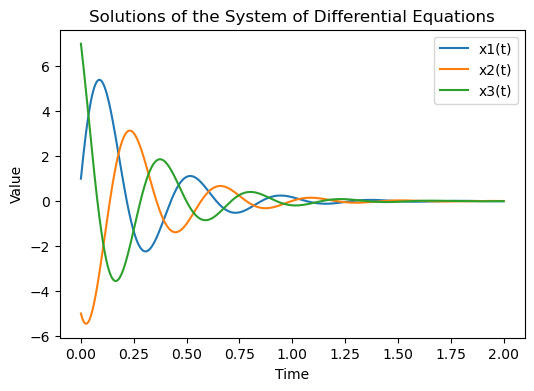

In [21]:
import numpy as np
from sympy import lambdify
import matplotlib.pyplot as plt

# Create a time range
t_range = np.linspace(0, 2, 1000)  # From 0 to 10 seconds, with 1000 points

# Convert symbolic solutions to numerical functions
x_functions = []
x_values = []
for sol in final_solution:
    x_functions.append(lambdify(t, sol, 'numpy'))
    x_values.append(x_functions[-1](t_range))

plt.figure(figsize=(6, 4))
for i in range(3):
    plt.plot(t_range, x_values[i], label=f"x{i+1}(t)")

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Solutions of the System of Differential Equations')
plt.legend();


- Numerical solution to compare:

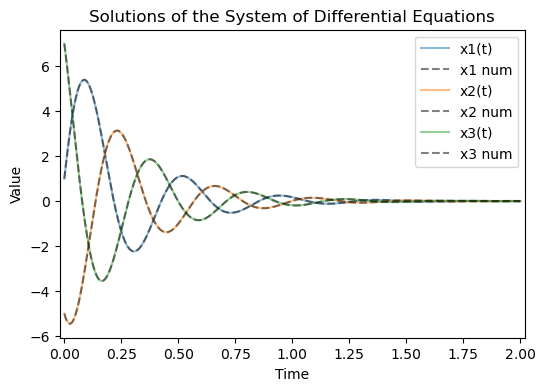

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def system(X, t, A):
    return A.dot(X)

A = np.array([[-5, -10, 7],
              [7, -5, -10],
              [-10, 7, -5]])
X0 = np.array([1, -5, 7])

# Time points
t = np.linspace(0, 2, 1000)
solution_numerical = odeint(system, X0, t, args=(A,))


plt.figure(figsize=(6, 4))
for i in range(3):
    plt.plot(t_range, x_values[i], label=f"x{i+1}(t)", alpha=0.5)
    plt.plot(t, solution_numerical[:, i], 'k--', label=f"x{i+1} num", alpha=0.5)
    

plt.xlabel('Time')
plt.ylabel('Value')
plt.margins(x=0.01)
plt.title('Solutions of the System of Differential Equations')
plt.legend();